<a href="https://colab.research.google.com/github/RiskyHermawan/TugasBesar_TKC_141_167/blob/main/CBIR_Project_141_167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

#Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [5]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"r1skyhacing","key":"ecc99266ee3559ce4ed64985b3c8594e"}
import json
import zipfile
import os
with open('/content/drive/MyDrive/kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/drive/MyDrive/kaggle/kaggle.json

In [6]:
# Unduh dataset dan ekstraksi zip
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import os
import zipfile

local_zip = 'flowers-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content') #mengeksrak file zip ke direktory yang sudah ditentukan
zip_ref.close()

#Training Model

In [8]:
!pip install split-folders

import splitfolders

In [9]:
base_dir = '/content/flowers'

In [11]:
splitfolders.ratio(base_dir, output='SplitingFlowers', seed=1337, ratio=(.8, .19, .01),group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 8 files [00:00, 77.97 files/s]
Copying files: 20 files [00:00, 99.82 files/s]
Copying files: 30 files [00:00, 99.41 files/s]
Copying files: 40 files [00:00, 99.14 files/s]
Copying files: 50 files [00:00, 98.30 files/s]
Copying files: 62 files [00:00, 103.37 files/s]
Copying files: 73 files [00:00, 99.91 files/s] 
Copying files: 84 files [00:00, 98.11 files/s]
Copying files: 94 files [00:00, 96.10 files/s]
Copying files: 106 files [00:01, 102.85 files/s]
Copying files: 117 files [00:01, 101.18 files/s]
Copying files: 128 files [00:01, 99.29 files/s] 
Copying files: 138 files [00:01, 98.66 files/s]
Copying files: 150 files [00:01, 104.33 files/s]
Copying files: 161 files [00:01, 101.49 files/s]
Copying files: 172 files [00:01, 101.18 files/s]
Copying files: 183 files [00:01, 95.33 files/s] 
Copying files: 196 files [00:01, 97.30 files/s]
Copying files: 206 files [00:02, 96.49 files/s]
Copying files: 216 files [00:02, 95.40 files/s

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

In [13]:
input_shape = (100, 100)

train = '/content/drive/MyDrive/kaggle/SplitingFlowers/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)
validation = '/content/drive/MyDrive/kaggle/SplitingFlowers/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test = '/content/drive/MyDrive/kaggle/SplitingFlowers/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 3452 images belonging to 5 classes.
Found 817 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


In [14]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [15]:
rgb = (3, )
shape = input_shape+rgb
dropout = 0.05
lr = 0.001
adam = Adam(learning_rate=lr)
los = 'categorical_crossentropy'
max_epoch = 100

In [16]:
model1 = Sequential()

model1.add(InputLayer(input_shape=shape))
model1.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(dropout))
model1.add(Dense(5, activation='softmax'))

# Print model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 256)    1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 128)      512       
 hNormalization)                                                 
                                                        

In [17]:
model1.compile(optimizer=adam, loss=los, metrics=['acc'])

In [19]:
H1 = model1.fit(train_generator,
                steps_per_epoch = 32, 
                epochs= max_epoch, 
                validation_data=validation_generator)

Epoch 1/100
32/32 [==============================] - 10s 319ms/step - loss: 6.1106 - acc: 0.2178 - val_loss: 2.1232 - val_acc: 0.2032
Epoch 2/100
32/32 [==============================] - 10s 298ms/step - loss: 2.4665 - acc: 0.2686 - val_loss: 2.0902 - val_acc: 0.1812
Epoch 3/100
32/32 [==============================] - 9s 282ms/step - loss: 1.7981 - acc: 0.3838 - val_loss: 3.2451 - val_acc: 0.2118
Epoch 4/100
32/32 [==============================] - 10s 320ms/step - loss: 1.6886 - acc: 0.3520 - val_loss: 4.6141 - val_acc: 0.2264
Epoch 5/100
32/32 [==============================] - 9s 281ms/step - loss: 1.8486 - acc: 0.3486 - val_loss: 2.6470 - val_acc: 0.1799
Epoch 6/100
32/32 [==============================] - 9s 277ms/step - loss: 1.6600 - acc: 0.4209 - val_loss: 1.6879 - val_acc: 0.2277
Epoch 7/100
32/32 [==============================] - 9s 281ms/step - loss: 1.5721 - acc: 0.3896 - val_loss: 2.2492 - val_acc: 0.2460
Epoch 8/100
32/32 [==============================] - 9s 278ms/step

Copying files: 2434 files [34:56,  1.16 files/s]


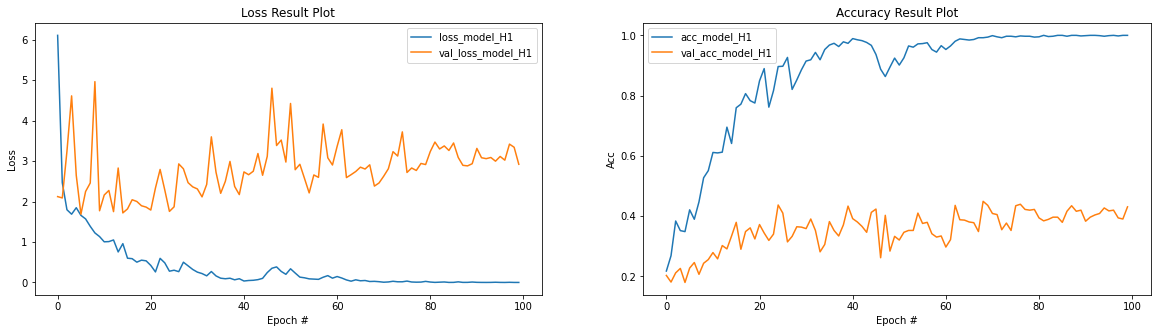

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 100), H1.history["loss"], label="loss_model_H1")
ax1.plot(np.arange(0, 100), H1.history["val_loss"], label="val_loss_model_H1")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.arange(0, 100), H1.history["acc"], label="acc_model_H1")
ax2.plot(np.arange(0, 100), H1.history["val_acc"], label="val_acc_model_H1")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model1.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.75      0.50      0.60        12
           2       0.29      0.22      0.25         9
           3       0.50      0.50      0.50         8
           4       0.29      0.45      0.36        11

    accuracy                           0.44        48
   macro avg       0.47      0.44      0.44        48
weighted avg       0.48      0.44      0.45        48

